# –í–≤–µ–¥–µ–Ω–∏–µ
–í –¥–∞–Ω–Ω–æ–º –±–ª–∫–æ–Ω–æ—Ç–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–æ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π YOLO 11 –∏ ResNet-101 –Ω–∞ –¥–∞—Ç–∞—Å–µ—Ç–µ Stanford Cars Dataset, –∞ —Ç–∞–∫–∂–µ –∏—Ö –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –º–∞—Ä–∫–∏ –∏ –º–æ–¥–µ–ª–∏ –º–∞—à–∏–Ω—ã –Ω–∞ –≤–∏–¥–µ–æ.

–°—Å—ã–ª–∫–∞ –Ω–∞ –¥–∞—Ç–∞—Å–µ—Ç https://www.kaggle.com/datasets/rickyyyyyyy/torchvision-stanford-cars

–ë—ã–ª–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω—ã –∫–∞–¥—Ä—ã –∏–∑ —Å–ª–µ–¥—É—é—â–∏—Ö –≤–∏–¥–µ–æ:

https://www.youtube.com/watch?v=KrDJ0nfLQCU
https://www.youtube.com/watch?v=rvn4lHrr6AQ
https://www.youtube.com/watch?v=Xx1qXusvMSo

# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –∫ –æ–±—É—á–µ–Ω–∏—é

In [ ]:
!pip install ultralytics

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 896.9/896.9 kB 22.2 MB/s eta 0:00:00


## –£—Å—Ç–∞–Ω–æ–≤–∫–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫ –∏ —Å–∫–∞—á–∏–≤–∞–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–∞

In [ ]:
import torch
import torchvision.datasets
import torchvision.transforms as transforms
import shutil
import os
import kagglehub
import matplotlib.pyplot as plt
from torchvision.datasets import StanfordCars
import pandas as pd
from ultralytics import YOLO
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
from torchvision.models import resnet101
from PIL import Image
import time
import cv2



In [ ]:
# Download latest version
path = kagglehub.dataset_download("rickyyyyyyy/torchvision-stanford-cars")

print("Path to dataset files:", path)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.83G/1.83G [00:28<00:00, 68.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/rickyyyyyyy/torchvision-stanford-cars/versions/2


## –°–æ–¥–µ—Ä–∂–∏–º–æ–µ –¥–∞—Ç–∞—Å–µ—Ç–∞ –∏ –∏–∑–º–µ–Ω–µ–Ω–∏–µ –µ–≥–æ —Å—Ç—Ä—É–∫—Ç—É—Ä—ã

–£–∑–Ω–∞–µ–º, –∫–∞–∫–∏–µ –º–æ–¥–µ–ª–∏ –∏ –º–∞—Ä–∫–∏ –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π –µ—Å—Ç—å –≤ Stanford Cars Dataset, –∞ —Ç–∞–∫–∂–µ –≤—ã–≤–µ–¥–µ–º –∏—Ö –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ.

In [ ]:
dataset = torchvision.datasets.StanfordCars(
    root=path,  # –ü—É—Ç—å –∫ –∑–∞–≥—Ä—É–∂–µ–Ω–Ω—ã–º –¥–∞–Ω–Ω—ã–º
    split='train',  # –ò—Å–ø–æ–ª—å–∑—É–µ–º —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
    download=False,  # –î–∞–Ω–Ω—ã–µ —É–∂–µ —Å–∫–∞—á–∞–Ω—ã, –Ω–µ –ø—ã—Ç–∞—Ç—å—Å—è –∏—Ö –∑–∞–≥—Ä—É–∂–∞—Ç—å
    transform=torchvision.transforms.ToTensor()
)

# –í—ã–≤–æ–¥ —Å–ø–∏—Å–∫–∞ –∫–ª–∞—Å—Å–æ–≤
class_names = dataset.classes
print("–í—Å–µ–≥–æ –∫–ª–∞—Å—Å–æ–≤:", len(class_names))
print("–ü—Ä–∏–º–µ—Ä—ã –∫–ª–∞—Å—Å–æ–≤:")
for i, class_name in enumerate(class_names):  # –ü–æ–∫–∞–∂–µ–º –ø–µ—Ä–≤—ã–µ 10 –∫–ª–∞—Å—Å–æ–≤
    print(f"{i + 1}: {class_name}")

–í—Å–µ–≥–æ –∫–ª–∞—Å—Å–æ–≤: 196
–ü—Ä–∏–º–µ—Ä—ã –∫–ª–∞—Å—Å–æ–≤:
1: AM General Hummer SUV 2000
2: Acura RL Sedan 2012
3: Acura TL Sedan 2012
4: Acura TL Type-S 2008
5: Acura TSX Sedan 2012
6: Acura Integra Type R 2001
7: Acura ZDX Hatchback 2012
8: Aston Martin V8 Vantage Convertible 2012
9: Aston Martin V8 Vantage Coupe 2012
10: Aston Martin Virage Convertible 2012
11: Aston Martin Virage Coupe 2012
12: Audi RS 4 Convertible 2008
13: Audi A5 Coupe 2012
14: Audi TTS Coupe 2012
15: Audi R8 Coupe 2012
16: Audi V8 Sedan 1994
17: Audi 100 Sedan 1994
18: Audi 100 Wagon 1994
19: Audi TT Hatchback 2011
20: Audi S6 Sedan 2011
21: Audi S5 Convertible 2012
22: Audi S5 Coupe 2012
23: Audi S4 Sedan 2012
24: Audi S4 Sedan 2007
25: Audi TT RS Coupe 2012
26: BMW ActiveHybrid 5 Sedan 2012
27: BMW 1 Series Convertible 2012
28: BMW 1 Series Coupe 2012
29: BMW 3 Series Sedan 2012
30: BMW 3 Series Wagon 2012
31: BMW 6 Series Convertible 2007
32: BMW X5 SUV 2007
33: BMW X6 SUV 2012
34: BMW M3 Coupe 2012
35: B

–£–±–µ–¥–∏–º—Å—è, —á—Ç–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç –º–µ—Ç–∫–∞–º.

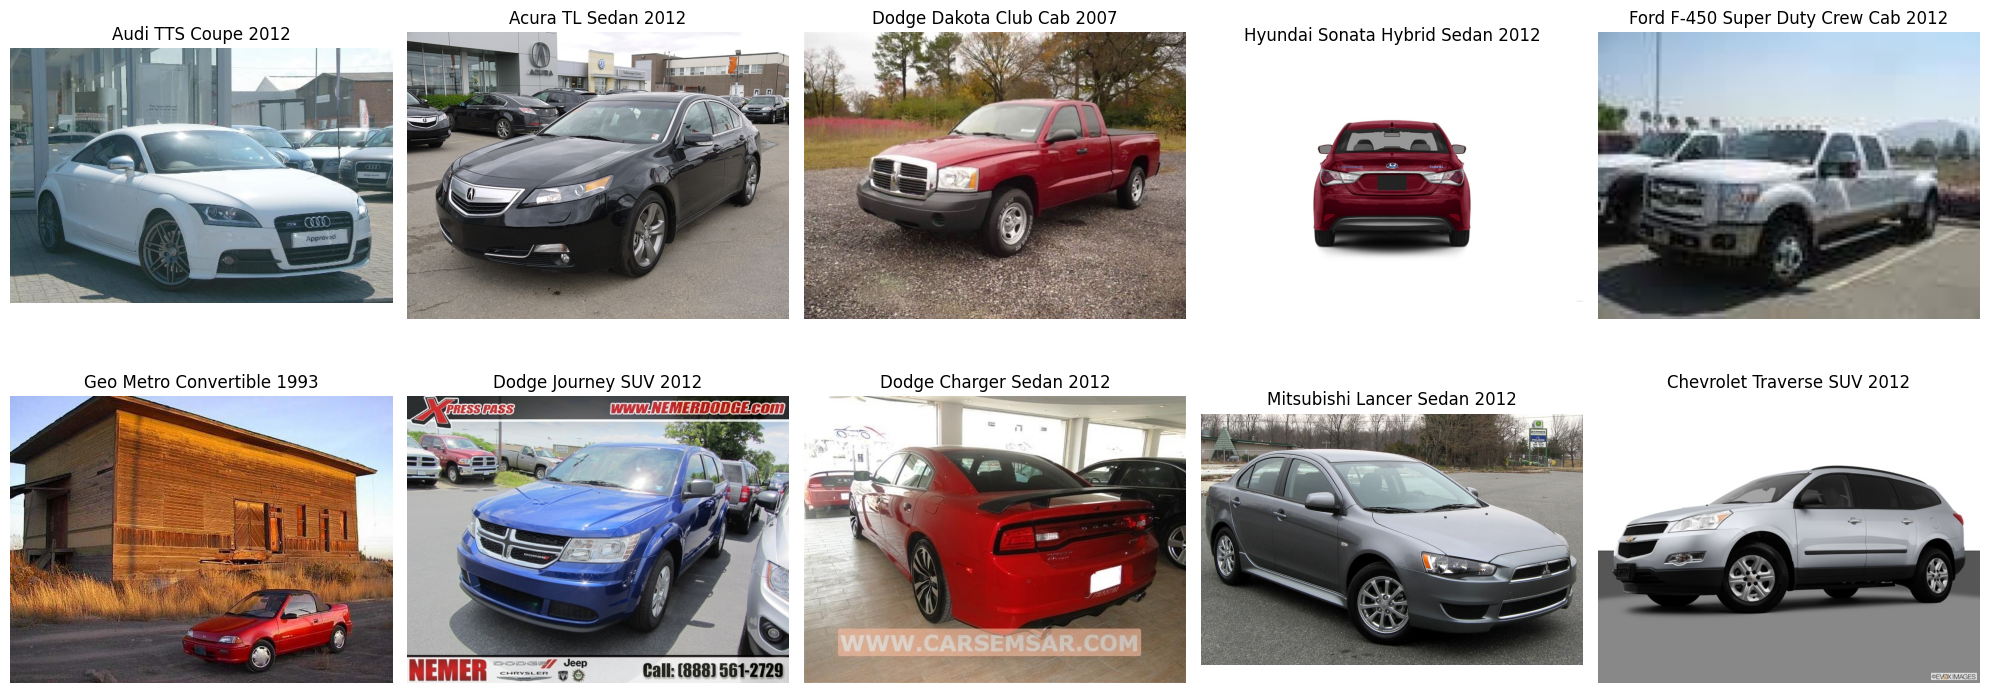

In [ ]:
# –í—ã–≤–æ–¥ 10 –∫–∞—Ä—Ç–∏–Ω–æ–∫: 2 —Å—Ç—Ä–æ–∫–∏ –ø–æ 5 –∫–∞—Ä—Ç–∏–Ω–æ–∫
num_images = 10
images_per_row = 5

fig, axes = plt.subplots(2, images_per_row, figsize=(20, 8))
for idx in range(num_images):
    image, label = dataset[idx]  # –ü–æ–ª—É—á–∞–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –∏ –º–µ—Ç–∫—É –∫–ª–∞—Å—Å–∞
    row, col = divmod(idx, images_per_row)  # –†–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ–º –ø–æ–∑–∏—Ü–∏—é –Ω–∞ —Å–µ—Ç–∫–µ (—Å—Ç—Ä–æ–∫–∞, —Å—Ç–æ–ª–±–µ—Ü)
    axes[row, col].imshow(image.permute(1, 2, 0))  # –ú–µ–Ω—è–µ–º –ø–æ—Ä—è–¥–æ–∫ –æ—Å–µ–π –¥–ª—è –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–≥–æ –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è
    axes[row, col].set_title(class_names[label])  # –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º –Ω–∞–∑–≤–∞–Ω–∏–µ –∫–ª–∞—Å—Å–∞
    axes[row, col].axis('off')  # –£–±–∏—Ä–∞–µ–º –æ—Å–∏

plt.tight_layout()
plt.show()


–ò–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π –∏ –º–µ—Ç–∫–∏ –∫ –Ω–∏–º —Å–æ–≤–ø–∞–¥–∞—é—Ç.

–ü–µ—Ä–µ–¥–µ–ª–∞–µ–º —Å—Ç—Ä—É–∫—Ç—É—Ä—É —Ñ–∞–π–ª–æ–≤ –≤ –∏—Å—Ö–æ–¥–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π.

In [ ]:
# –ü–∞–ø–∫–∏ –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö
output_dir = "./data"
train_dir = os.path.join(output_dir, "train")
val_dir = os.path.join(output_dir, "val")
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –ø–æ –∫–ª–∞—Å—Å–∞–º
for split in ["train", "test"]:
    dataset = StanfordCars(root=path, split=split, download=False)
    for idx, (image, label) in enumerate(dataset):
        class_name = class_names[label]
        split_dir = train_dir if split == "train" else val_dir
        class_dir = os.path.join(split_dir, class_name)
        os.makedirs(class_dir, exist_ok=True)

        # –°–æ—Ö—Ä–∞–Ω—è–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
        image_path = os.path.join(class_dir, f"{idx}.jpg")
        image.save(image_path)


# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π

## YOLO 11

–û–±—É—á–µ–Ω–∏–µ –±—É–¥–µ—Ç –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç—å 25 —ç–ø–æ—Ö, —Ç–∞–∫ –∫–∞–∫ —ç—Ç–æ–≥–æ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π –º–æ–¥–µ–ª–∏, –∞ —Ç–∞–∫–∂–µ –Ω–µ –æ—á–µ–Ω—å –∑–∞—Ç—Ä–∞—Ç–Ω–æ –ø–æ –≤—Ä–µ–º–µ–Ω–∏.

In [ ]:
# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –º–æ–¥–µ–ª–∏ YOLOv11 –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
model = YOLO("yolo11m-cls.pt")

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
model.train(
    data="./data",  # –ü—É—Ç—å –∫ –¥–∞–Ω–Ω—ã–º
    epochs=25,      # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö
    imgsz=224,      # –†–∞–∑–º–µ—Ä –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
    batch=32,       # –†–∞–∑–º–µ—Ä –±–∞—Ç—á–∞
)


Ultralytics 8.3.39 üöÄ Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolo11m-cls.pt, data=./data, epochs=25, time=None, patience=100, batch=32, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, lin

train: Scanning /content/data/train... 8144 images, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 8144/8144 [00:00<?, ?it/s]
val: Scanning /content/data/val... 8041 images, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 8041/8041 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 49 weight(decay=0.0), 50 weight(decay=0.0005), 50 bias(decay=0.0)
TensorBoard: model graph visualization added ‚úÖ
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train4
Starting training for 25 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [01:12<00:00,  1.74it/s]

                   all      0.257      0.546



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [01:10<00:00,  1.78it/s]

                   all      0.508      0.827



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [01:09<00:00,  1.81it/s]

                   all      0.561      0.853



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [01:09<00:00,  1.82it/s]

                   all      0.633      0.898



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [01:08<00:00,  1.83it/s]

                   all      0.715      0.933



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [01:07<00:00,  1.88it/s]

                   all      0.739      0.942



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [01:09<00:00,  1.80it/s]

                   all      0.773      0.955



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [01:10<00:00,  1.79it/s]

                   all      0.811      0.961



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [01:09<00:00,  1.82it/s]

                   all      0.825      0.961



      Epoch    GPU_mem       loss  Instances       Size


      10/25      1.64G     0.5131         16        224: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 255/255 [01:35<00:00,  2.68it/s]
               classes   top1_acc   top5_acc: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [01:08<00:00,  1.83it/s]

                   all      0.827      0.969



      Epoch    GPU_mem       loss  Instances       Size


      11/25      1.65G     0.4595         16        224: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 255/255 [01:36<00:00,  2.63it/s]
               classes   top1_acc   top5_acc: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [01:07<00:00,  1.86it/s]

                   all      0.833       0.97



      Epoch    GPU_mem       loss  Instances       Size


      12/25      1.64G     0.4041         16        224: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 255/255 [01:35<00:00,  2.68it/s]
               classes   top1_acc   top5_acc: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [01:08<00:00,  1.85it/s]

                   all      0.849      0.973



      Epoch    GPU_mem       loss  Instances       Size


      13/25      1.65G     0.3335         16        224: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 255/255 [01:34<00:00,  2.71it/s]
               classes   top1_acc   top5_acc: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [01:09<00:00,  1.82it/s]

                   all      0.853      0.976



      Epoch    GPU_mem       loss  Instances       Size


      14/25      1.64G     0.2946         16        224: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 255/255 [01:33<00:00,  2.72it/s]
               classes   top1_acc   top5_acc: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [01:10<00:00,  1.79it/s]

                   all      0.865      0.975



      Epoch    GPU_mem       loss  Instances       Size


      15/25      1.65G     0.2733         16        224: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 255/255 [01:34<00:00,  2.70it/s]
               classes   top1_acc   top5_acc: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [01:07<00:00,  1.86it/s]

                   all      0.873      0.977



      Epoch    GPU_mem       loss  Instances       Size


      16/25      1.64G     0.2533         16        224: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 255/255 [01:37<00:00,  2.61it/s]
               classes   top1_acc   top5_acc: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [01:07<00:00,  1.86it/s]

                   all      0.871      0.979



      Epoch    GPU_mem       loss  Instances       Size


      17/25      1.65G     0.2321         16        224: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 255/255 [01:32<00:00,  2.77it/s]
               classes   top1_acc   top5_acc: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [01:09<00:00,  1.81it/s]

                   all      0.878       0.98



      Epoch    GPU_mem       loss  Instances       Size


      18/25      1.64G     0.1925         16        224: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 255/255 [01:33<00:00,  2.74it/s]
               classes   top1_acc   top5_acc: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [01:09<00:00,  1.81it/s]

                   all      0.883      0.983



      Epoch    GPU_mem       loss  Instances       Size


      19/25      1.65G     0.1807         16        224: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 255/255 [01:34<00:00,  2.71it/s]
               classes   top1_acc   top5_acc: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [01:09<00:00,  1.82it/s]

                   all      0.886      0.982



      Epoch    GPU_mem       loss  Instances       Size


      20/25      1.64G     0.1629         16        224: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 255/255 [01:34<00:00,  2.69it/s]
               classes   top1_acc   top5_acc: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [01:08<00:00,  1.84it/s]

                   all      0.888      0.981



      Epoch    GPU_mem       loss  Instances       Size


      21/25      1.65G     0.1584         16        224: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 255/255 [01:35<00:00,  2.67it/s]
               classes   top1_acc   top5_acc: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [01:09<00:00,  1.82it/s]

                   all      0.892      0.982



      Epoch    GPU_mem       loss  Instances       Size


      22/25      1.64G     0.1302         16        224: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 255/255 [01:33<00:00,  2.71it/s]
               classes   top1_acc   top5_acc: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [01:10<00:00,  1.80it/s]

                   all      0.894      0.984



      Epoch    GPU_mem       loss  Instances       Size


      23/25      1.65G     0.1243         16        224: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 255/255 [01:35<00:00,  2.66it/s]
               classes   top1_acc   top5_acc: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [01:09<00:00,  1.83it/s]

                   all      0.896      0.983



      Epoch    GPU_mem       loss  Instances       Size


      24/25      1.64G     0.1149         16        224: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 255/255 [01:35<00:00,  2.67it/s]
               classes   top1_acc   top5_acc: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [01:09<00:00,  1.82it/s]

                   all        0.9      0.985



      Epoch    GPU_mem       loss  Instances       Size


      25/25      1.65G    0.09977         16        224: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 255/255 [01:33<00:00,  2.72it/s]
               classes   top1_acc   top5_acc: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [01:09<00:00,  1.81it/s]

                   all      0.901      0.985



25 epochs completed in 1.165 hours.
Optimizer stripped from runs/classify/train4/weights/last.pt, 21.4MB
Optimizer stripped from runs/classify/train4/weights/best.pt, 21.4MB

Validating runs/classify/train4/weights/best.pt...
Ultralytics 8.3.39 üöÄ Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m-cls summary (fused): 138 layers, 10,592,708 parameters, 0 gradients, 39.5 GFLOPs
train: /content/data/train... found 8144 images in 196 classes ‚úÖ 
val: /content/data/val... found 8041 images in 196 classes ‚úÖ 
test: None...


               classes   top1_acc   top5_acc: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [01:09<00:00,  1.81it/s]


                   all      0.901      0.985
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train4


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d3b801ac250>
curves: []
curves_results: []
fitness: 0.9428553879261017
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.901007354259491, 'metrics/accuracy_top5': 0.9847034215927124, 'fitness': 0.9428553879261017}
save_dir: PosixPath('runs/classify/train4')
speed: {'preprocess': 0.07364346959996826, 'inference': 0.7914058487001098, 'loss': 0.00028909105164037237, 'postprocess': 0.00023266640843302587}
task: 'classify'
top1: 0.901007354259491
top5: 0.9847034215927124

–ò–∑ –æ—Ç–ª–∞–¥–æ—á–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –≤–∏–¥–Ω–æ, —á—Ç–æ –æ–±—É—á–µ–Ω–∏–µ –∑–∞–Ω—è–ª–æ —á—É—Ç—å –±–æ–ª—å—à–µ 1-–≥–æ —á–∞—Å–∞.

–í—ã–≤–µ–¥–µ–º –≤ –≤–∏–¥–µ –≥—Ä–∞—Ñ–∏–∫–∞, –∫–∞–∫ –∏–∑–º–µ–Ω—è–ª–∏—Å—å –ø–æ—Ç–µ—Ä–∏ –∏ accuracy –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ –æ–±—É—á–µ–Ω–∏—è.

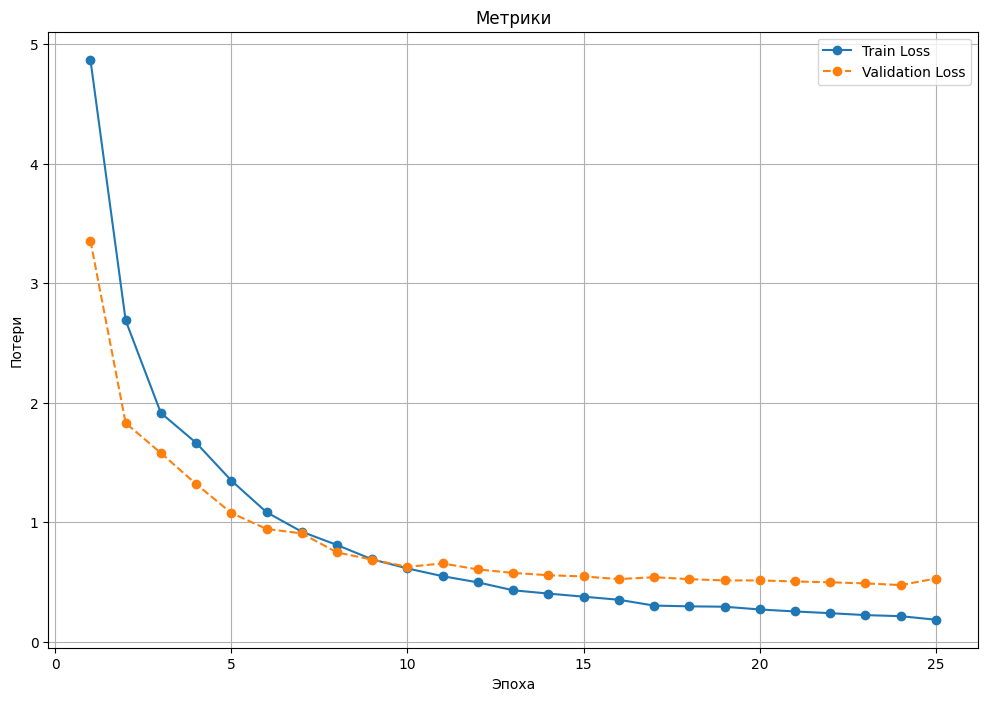

In [ ]:

# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö –∏–∑ CSV
file_path = "/content/runs/classify/train/results.csv"
data = pd.read_csv(file_path)


# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤
plt.figure(figsize=(12, 8))

# –ì—Ä–∞—Ñ–∏–∫ Loss
plt.plot(data["epoch"], data["train/loss"], label="Train Loss", marker='o', linestyle='-')
plt.plot(data["epoch"], data["val/loss"], label="Validation Loss", marker='o', linestyle='--')

# –û—Ñ–æ—Ä–º–ª–µ–Ω–∏–µ
plt.title("–ú–µ—Ç—Ä–∏–∫–∏")
plt.xlabel("–≠–ø–æ—Ö–∞")
plt.ylabel("–ü–æ—Ç–µ—Ä–∏")
plt.legend()
plt.grid(True)

# –ü–æ–∫–∞–∑ –≥—Ä–∞—Ñ–∏–∫–∞
plt.show()


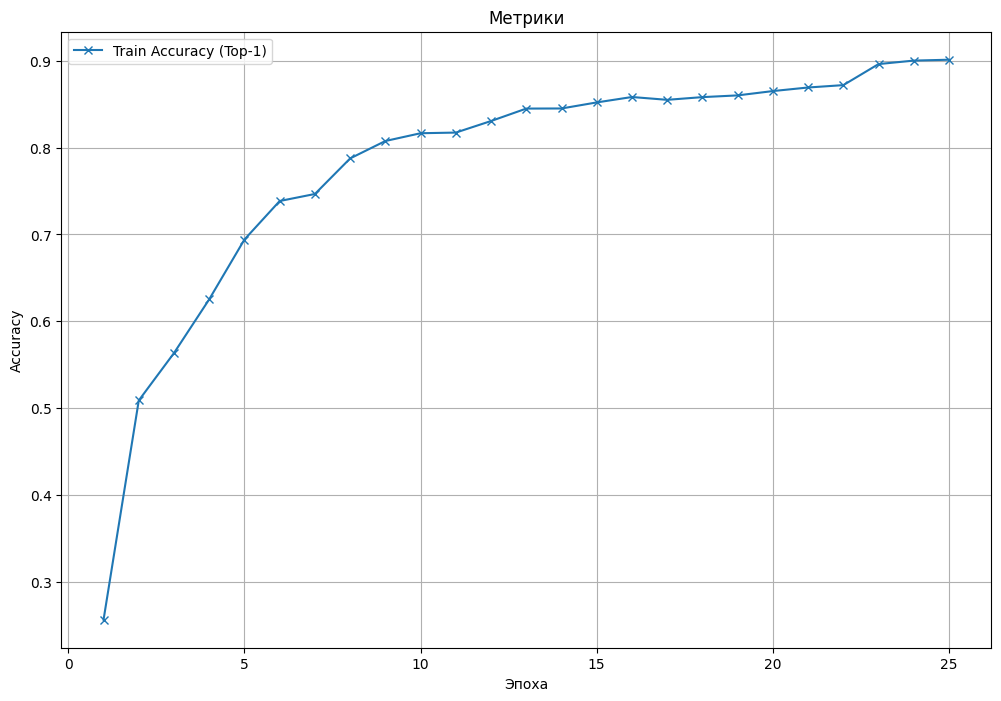

In [ ]:
plt.figure(figsize=(12, 8))
# –ì—Ä–∞—Ñ–∏–∫ Accuracy
plt.plot(data["epoch"], data["metrics/accuracy_top1"], label="Train Accuracy (Top-1)", marker='x', linestyle='-')
# –û—Ñ–æ—Ä–º–ª–µ–Ω–∏–µ
plt.title("–ú–µ—Ç—Ä–∏–∫–∏")
plt.xlabel("–≠–ø–æ—Ö–∞")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# –ü–æ–∫–∞–∑ –≥—Ä–∞—Ñ–∏–∫–∞
plt.show()

–ü–æ –≥—Ä–∞—Ñ–∏–∫–∞–º –º–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å, —á—Ç–æ –¥–ª—è –¥–æ—Å—Ç–∏–∂–µ–Ω–∏—è —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π YOLO 11 –≤–ø–æ–ª–Ω–µ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –∏ 10 —ç–ø–æ—Ö (–æ—Å–æ–±–µ–Ω–Ω–æ, –µ—Å–ª–∏ –≤—Ä–µ–º–µ–Ω–∏ –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –Ω—É–∂–Ω–æ –∫–∞–∫ –º–æ–∂–Ω–æ –º–µ–Ω—å—à–µ)

–°–æ—Ö—Ä–∞–Ω–∏–º —Ñ–∞–π–ª —Å –ª—É—á—à–µ–π –º–æ–¥–µ–ª—å—é –≤ –∫–æ—Ä–Ω–µ–≤—É—é –ø–∞–ø–∫—É.

In [ ]:
# –ò—Å—Ö–æ–¥–Ω—ã–π –ø—É—Ç—å –∫ –º–æ–¥–µ–ª–∏
source_path = "/content/runs/classify/train/weights/best.pt"  # –£–∫–∞–∂–∏—Ç–µ –∞–∫—Ç—É–∞–ª—å–Ω—ã–π –ø—É—Ç—å –∫ –≤–∞—à–µ–π –º–æ–¥–µ–ª–∏

# –ü—É—Ç—å –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—è
destination_path = "/content/yolo11_model_cars.pt"

# –ü—Ä–æ–≤–µ—Ä—è–µ–º, —Å—É—â–µ—Å—Ç–≤—É–µ—Ç –ª–∏ –∏—Å—Ö–æ–¥–Ω—ã–π —Ñ–∞–π–ª
if os.path.exists(source_path):
    # –ü–µ—Ä–µ–º–µ—â–∞–µ–º –∏ –ø–µ—Ä–µ–∏–º–µ–Ω–æ–≤—ã–≤–∞–µ–º
    shutil.move(source_path, destination_path)
else:
    print(f"–§–∞–π–ª {source_path} –Ω–µ –Ω–∞–π–¥–µ–Ω!")

## ResNet-101

–û–±—É—á–µ–Ω–∏–µ ResNet-101 —Ç–∞–∫ –∂–µ –±—É–¥–µ—Ç –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç—å—Å—è –≤ —Ç–µ—á–µ–Ω–∏–µ 25 —ç–ø–æ—Ö, —á—Ç–æ–±—ã —Å—Ä–∞–≤–Ω–∏—Ç—å –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è –∏ –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏ —Å YOLO 11.

In [ ]:
# –£—Å—Ç—Ä–æ–π—Å—Ç–≤–∞
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö
data_transforms = {
    "train": transforms.Compose([
        transforms.Resize((224, 224)),  # –†–∞–∑–º–µ—Ä –¥–ª—è –≤—Ö–æ–¥–∞ –≤ ResNet
        transforms.RandomHorizontalFlip(),  # –ê—É–≥–º–µ–Ω—Ç–∞—Ü–∏—è
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è
    ]),
    "val": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# –ü—É—Ç—å –∫ –¥–∞–Ω–Ω—ã–º
data_dir = "./data"

# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
datasets_dict = {
    phase: datasets.ImageFolder(root=f"{data_dir}/{phase}", transform=data_transforms[phase])
    for phase in ["train", "val"]
}
dataloaders = {
    phase: DataLoader(datasets_dict[phase], batch_size=32, shuffle=True, num_workers=4)
    for phase in ["train", "val"]
}

# –£–±–µ–¥–∏–º—Å—è, —á—Ç–æ –¥–∞—Ç–∞—Å–µ—Ç –≤–µ—Ä–Ω–æ —Å—á–∏—Ç–∞–ª—Å—è, –≤—ã–≤–µ–¥—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–æ–≤
num_classes = len(datasets_dict["train"].classes)
print("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–æ–≤:", num_classes)


–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–æ–≤: 196


In [ ]:
# –ó–∞–≥—Ä—É–∑–∫–∞ –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ ResNet-101
model = models.resnet101(pretrained=True)

# –ó–∞–º–µ–Ω–∞ —Ñ–∏–Ω–∞–ª—å–Ω–æ–≥–æ —Å–ª–æ—è –¥–ª—è –Ω–∞—à–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Å–æ–≤
model.fc = nn.Linear(model.fc.in_features, num_classes)

# –ü–µ—Ä–µ–Ω–æ—Å –º–æ–¥–µ–ª–∏ –Ω–∞ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ
model = model.to(device)


In [ ]:
# –§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å –∏ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# scheduler –¥–ª—è —É–º–µ–Ω—å—à–µ–Ω–∏—è learning rate –ø—Ä–∏ –ø–ª–∞—Ç–æ
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)


In [ ]:
def train_model(model, dataloaders, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = model.state_dict()
    best_acc = 0.0

    # –°–ø–∏—Å–∫–∏ –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏–π loss –∏ accuracy
    history = {
        "epoch": [],
        "train_loss": [],
        "train_acc": [],
        "val_loss": [],
        "val_acc": []
    }

    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        print("-" * 10)

        for phase in ["train", "val"]:
            if phase == "train":
                model.train()  # –í–∫–ª—é—á–∏—Ç—å –æ–±—É—á–µ–Ω–∏–µ
            else:
                model.eval()   # –í–∫–ª—é—á–∏—Ç—å –æ—Ü–µ–Ω–∫—É

            running_loss = 0.0
            running_corrects = 0

            # –ò—Ç–µ—Ä–∞—Ü–∏—è –ø–æ –¥–∞–Ω–Ω—ã–º
            for inputs, labels in dataloaders[phase]:
                inputs, labels = inputs.to(device), labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == "train"):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == "train":
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print(f"{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

            # –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
            if phase == "train":
                history["train_loss"].append(epoch_loss)
                history["train_acc"].append(epoch_acc.item())
            else:
                history["val_loss"].append(epoch_loss)
                history["val_acc"].append(epoch_acc.item())

            if phase == "val" and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

        history["epoch"].append(epoch + 1)

    time_elapsed = time.time() - since
    print(f"Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s")
    print(f"Best val Acc: {best_acc:.4f}")

    # –ó–∞–≥—Ä—É–∂–∞–µ–º –ª—É—á—à–∏–µ –≤–µ—Å–∞
    model.load_state_dict(best_model_wts)

    return model, history


# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
model, history = train_model(model, dataloaders, criterion, optimizer, scheduler, num_epochs=25)

# –°–æ–∑–¥–∞–Ω–∏–µ DataFrame –∏–∑ —Å–ª–æ–≤–∞—Ä—è history
history_df = pd.DataFrame(history)

# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –≤ CSV —Ñ–∞–π–ª
history_df.to_csv("/content/training_history_resnet.csv", index=False)

# –ü—Ä–æ–≤–µ—Ä–∫–∞ —Å–æ—Ö—Ä–∞–Ω—ë–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
print("–ò—Å—Ç–æ—Ä–∏—è –æ–±—É—á–µ–Ω–∏—è:", history)

torch.save(model.state_dict(), "resnet101_stanford_cars.pth")
print("–ú–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞!")

Epoch 1/25
----------
train Loss: 3.9492 Acc: 0.1916
val Loss: 2.4192 Acc: 0.4278
Epoch 2/25
----------
train Loss: 1.7405 Acc: 0.6093
val Loss: 1.4756 Acc: 0.6114
Epoch 3/25
----------
train Loss: 0.7999 Acc: 0.8183
val Loss: 1.0145 Acc: 0.7172
Epoch 4/25
----------
train Loss: 0.4026 Acc: 0.9093
val Loss: 0.7792 Acc: 0.7809
Epoch 5/25
----------
train Loss: 0.2367 Acc: 0.9514
val Loss: 0.7199 Acc: 0.7952
Epoch 6/25
----------
train Loss: 0.1529 Acc: 0.9691
val Loss: 0.6173 Acc: 0.8268
Epoch 7/25
----------
train Loss: 0.1136 Acc: 0.9790
val Loss: 0.6932 Acc: 0.8087
Epoch 8/25
----------
train Loss: 0.1112 Acc: 0.9774
val Loss: 0.7175 Acc: 0.8028
Epoch 9/25
----------
train Loss: 0.1035 Acc: 0.9805
val Loss: 0.7218 Acc: 0.8033
Epoch 10/25
----------
train Loss: 0.0865 Acc: 0.9807
val Loss: 0.8599 Acc: 0.7712
Epoch 11/25
----------
train Loss: 0.1096 Acc: 0.9732
val Loss: 0.8874 Acc: 0.7657
Epoch 12/25
----------
train Loss: 0.0912 Acc: 0.9774
val Loss: 0.7533 Acc: 0.7967
Epoch 13/25
-

–û–±—É—á–µ–Ω–∏–µ –∑–∞–Ω—è–ª–æ 1 —á–∞—Å –∏ 30 –º–∏–Ω—É—Ç, —á—Ç–æ –±–æ–ª—å—à–µ, —á–µ–º —É YOLO.

–ò—Å–ø–æ–ª—å–∑—É–µ–º csv —Ñ–∞–π–ª —Å –¥–∞–Ω–Ω—ã–º–∏ –æ–± –∏–∑–º–µ–Ω–µ–Ω–∏–∏ –º–µ—Ç—Ä–∏–∫ –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ –æ–±—É—á–µ–Ω–∏—è –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –≥—Ä–∞—Ñ–∏–∫–∞.

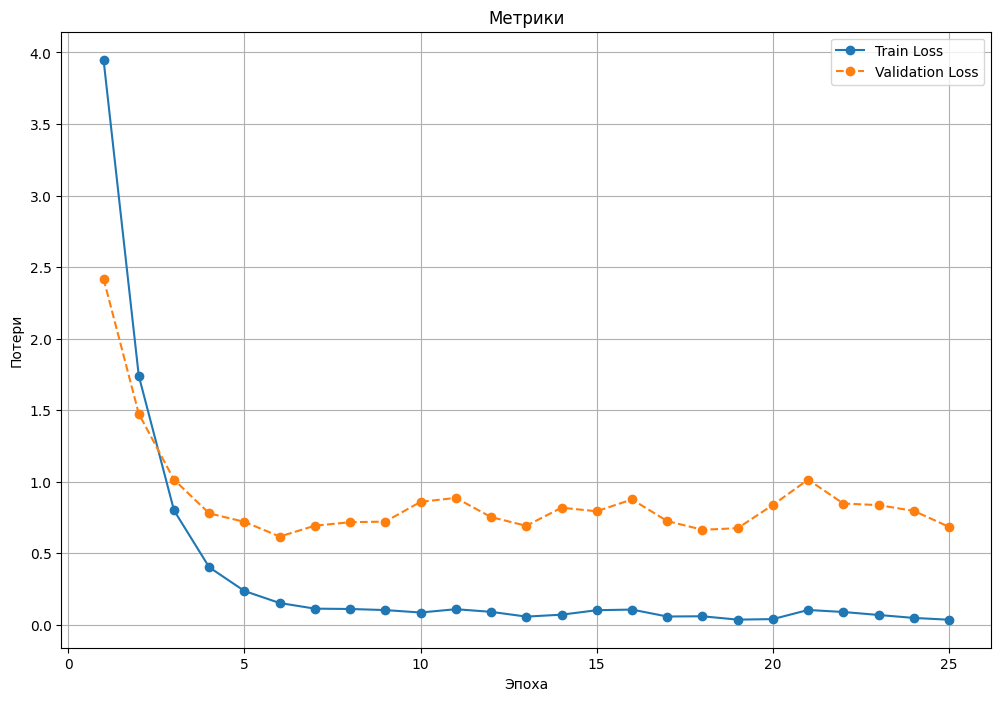

In [ ]:
# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö –∏–∑ CSV
file_path = "/content/training_history_resnet.csv"  # –£–∫–∞–∂–∏—Ç–µ –ø—É—Ç—å –∫ –≤–∞—à–µ–º—É —Ñ–∞–π–ª—É
data = pd.read_csv(file_path)


# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤
plt.figure(figsize=(12, 8))

# –ì—Ä–∞—Ñ–∏–∫ Loss
plt.plot(data["epoch"], data["train_loss"], label="Train Loss", marker='o', linestyle='-')
plt.plot(data["epoch"], data["val_loss"], label="Validation Loss", marker='o', linestyle='--')

# –û—Ñ–æ—Ä–º–ª–µ–Ω–∏–µ
plt.title("–ú–µ—Ç—Ä–∏–∫–∏")
plt.xlabel("–≠–ø–æ—Ö–∞")
plt.ylabel("–ü–æ—Ç–µ—Ä–∏")
plt.legend()
plt.grid(True)

# –ü–æ–∫–∞–∑ –≥—Ä–∞—Ñ–∏–∫–∞
plt.show()


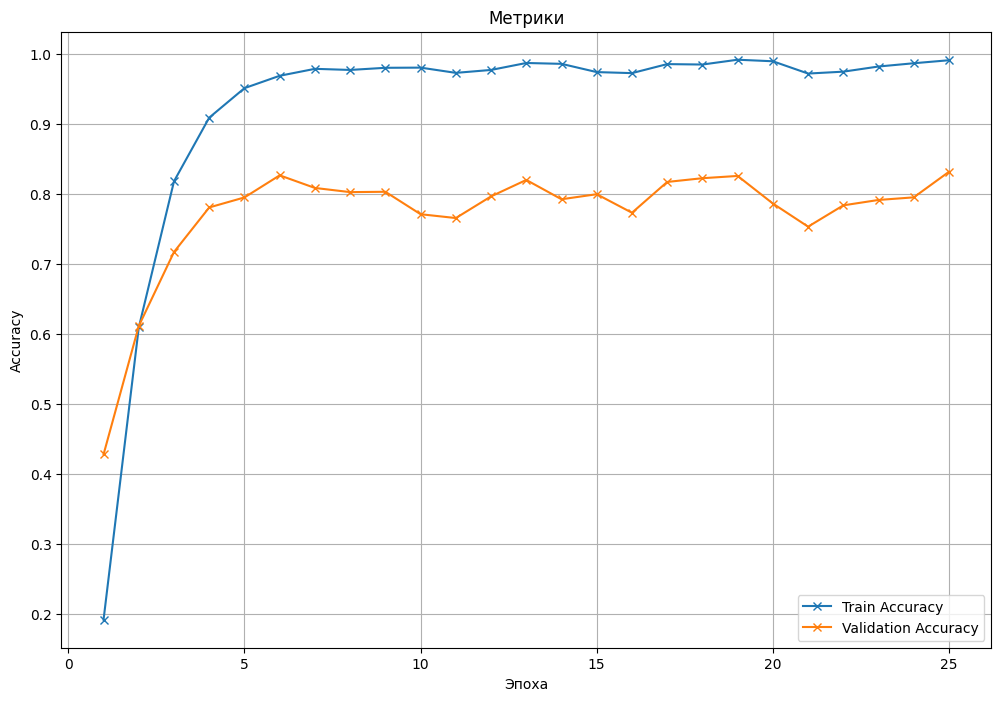

In [ ]:
plt.figure(figsize=(12, 8))
# –ì—Ä–∞—Ñ–∏–∫ Accuracy
plt.plot(data["epoch"], data["train_acc"], label="Train Accuracy", marker='x')
plt.plot(data["epoch"], data["val_acc"], label="Validation Accuracy", marker='x')
# –û—Ñ–æ—Ä–º–ª–µ–Ω–∏–µ
plt.title("–ú–µ—Ç—Ä–∏–∫–∏")
plt.xlabel("–≠–ø–æ—Ö–∞")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# –ü–æ–∫–∞–∑ –≥—Ä–∞—Ñ–∏–∫–∞
plt.show()

–ï—Å–ª–∏ —Å—Ä–∞–≤–Ω–∏–≤–∞—Ç—å –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ loss –∏ accuracy, —Ç–æ accuracy —É YOLO –Ω–µ–º–Ω–æ–≥–æ –≤—ã—à–µ, –∞ loss –ø—Ä–∏–º–µ—Ä–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ —É –æ–±–µ–∏—Ö –º–æ–¥–µ–ª–µ–π.

# –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è

## –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –Ω–∞ –∫–∞—Ä—Ç–∏–Ω–∫–∞—Ö

–ü—Ä–µ–¥—Å–∫–∞–∂–µ–º –∫–ª–∞—Å—Å –∞–≤—Ç–æ–º–æ–±–∏–ª—è Volkswagen Golf Hatchback 2012, –∫–ª–∞—Å—Å –∫–æ—Ç–æ—Ä–æ–≥–æ –µ—Å—Ç—å –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ. –ê —Ç–∞–∫–∂–µ –≤—ã–≤–µ–¥–µ–º –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è. –ù–∞—á–Ω—ë–º —Å YOLO 11.


image 1/1 /content/golf.jpg: 224x224 Volkswagen Golf Hatchback 2012 0.98, Hyundai Elantra Touring Hatchback 2012 0.02, Mercedes-Benz C-Class Sedan 2012 0.00, Daewoo Nubira Wagon 2002 0.00, BMW 1 Series Coupe 2012 0.00, 5.8ms
Speed: 2.9ms preprocess, 5.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


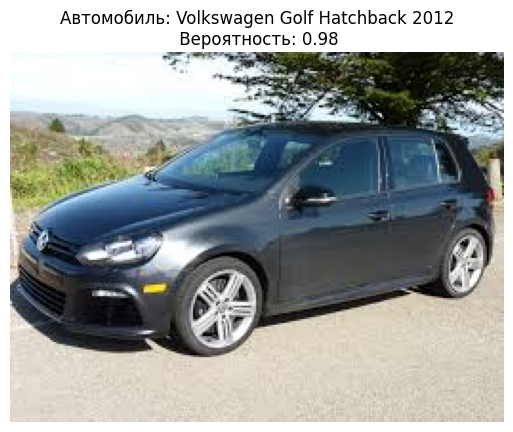

In [ ]:

# –ó–∞–≥—Ä—É–∑–∏–º –º–æ–¥–µ–ª—å YOLO
yolo_model_test = YOLO("/content/yolo11_model_cars.pt")

# –í—ã–ø–æ–ª–Ω–∏–º –∏–Ω—Ñ–µ—Ä–µ–Ω—Å
results = yolo_model_test('/content/golf.jpg')

# –û–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
for result in results:
    # –ü–æ–ª—É—á–∞–µ–º –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
    class_probs = result.probs  # Probs –æ–±—ä–µ–∫—Ç
    class_names = yolo_model_test.names  # –°–ø–∏—Å–æ–∫ –Ω–∞–∑–≤–∞–Ω–∏–π –∫–ª–∞—Å—Å–æ–≤

    if class_probs is not None:
        # –ò—Å–ø–æ–ª—å–∑—É–µ–º –≤—Å—Ç—Ä–æ–µ–Ω–Ω—ã–µ –∞—Ç—Ä–∏–±—É—Ç—ã Probs –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è —Ç–æ–ø–æ–≤–æ–≥–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
        class_id = class_probs.top1  # –ò–Ω–¥–µ–∫—Å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞
        confidence = class_probs.top1conf.item()  # –£–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏
        class_label = class_names[class_id]  # –ù–∞–∑–≤–∞–Ω–∏–µ –∫–ª–∞—Å—Å–∞

        # –ó–∞–≥—Ä—É–∂–∞–µ–º –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
        img = cv2.imread('/content/golf.jpg')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ RGB –¥–ª—è –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è

        # –í—ã–≤–æ–¥–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
        plt.imshow(img)
        plt.title(f"–ê–≤—Ç–æ–º–æ–±–∏–ª—å: {class_label}\n –í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å: {confidence:.2f}")
        plt.axis('off')
        plt.show()
    else:
        print("No class probabilities found.")

–û—Ç–≤–µ—Ç –≤–µ—Ä–Ω—ã–π. –í—ã–≤–µ–¥–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ ResNet-101.

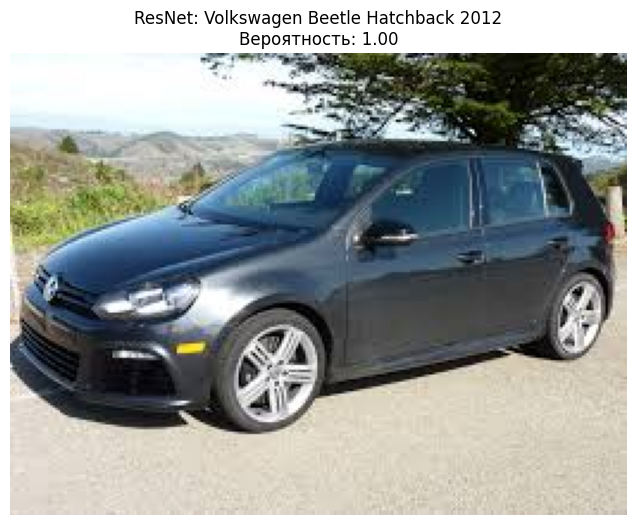

In [ ]:
resnet_model_path = "/content/resnet101_stanford_cars.pth"
image_path = "/content/golf.jpg"

# –ó–∞–≥—Ä—É–∑–∫–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
image = Image.open(image_path).convert("RGB")
img_cv2 = cv2.imread(image_path)
img_cv2 = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)  # –î–ª—è –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è –≤ RGB

# –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –¥–ª—è ResNet
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
input_image = transform(image).unsqueeze(0)  # –î–æ–±–∞–≤–ª—è–µ–º batch dimension

# –°–æ–∑–¥–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ ResNet –∏ –∑–∞–≥—Ä—É–∑–∫–∞ –≤–µ—Å–æ–≤
resnet_model = resnet101(pretrained=False, num_classes=len(class_names))  # –£–∫–∞–∑—ã–≤–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–æ–≤
resnet_model.load_state_dict(torch.load(resnet_model_path))  # –ó–∞–≥—Ä—É–∑–∫–∞ –≤–µ—Å–æ–≤
resnet_model.eval()  # –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º –º–æ–¥–µ–ª—å –≤ —Ä–µ–∂–∏–º –æ—Ü–µ–Ω–∫–∏

# –í—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è ResNet
with torch.no_grad():
    resnet_output = resnet_model(input_image)
    probabilities = torch.softmax(resnet_output, dim=1)  # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤—ã—Ö–æ–¥ –≤ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏
    resnet_prediction = torch.argmax(probabilities, 1).item()  # –ò–Ω–¥–µ–∫—Å –∫–ª–∞—Å—Å–∞
    resnet_label = class_names[resnet_prediction]  # –ù–∞–∑–≤–∞–Ω–∏–µ –∫–ª–∞—Å—Å–∞
    confidence = probabilities[0, resnet_prediction].item()  # –í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞

# –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞ ResNet
plt.figure(figsize=(12, 6))
plt.imshow(img_cv2)
plt.title(f"ResNet: {resnet_label}\n–í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å: {confidence:.2f}")
plt.axis("off")
plt.show()

–û—Ç–≤–µ—Ç —Ç–∞–∫ –∂–µ –≤–µ—Ä–µ–Ω, –Ω–æ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –Ω–µ–º–Ω–æ–≥–æ –≤—ã—à–µ.

## –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –Ω–∞ –≤–∏–¥–µ–æ

–ò—Å—Ö–æ–¥–Ω–æ–µ –≤–∏–¥–µ–æ —Å–æ–¥–µ—Ä–∂–∏—Ç –æ—Ç—Ä–µ–∑–∫–∏ —Å —Ç—Ä–µ–º—è –∞–≤—Ç–æ–º–æ–±–∏–ª—è–º–∏.

–ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –Ω–∞ –≤–∏–¥–µ–æ –±—É–¥–µ—Ç –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∞ —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º - –≤–∏–¥–µ–æ –±—É–¥–µ—Ç –ø–æ–¥–µ–ª–µ–Ω–æ –Ω–∞ –∫–∞–¥—Ä—ã, –Ω–∞ –∫–∞–∂–¥–æ–º –∫–∞–¥—Ä–µ –±—É–¥–µ—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω –∞–≤—Ç–æ–º–æ–±–∏–ª—å, –∞ –∑–∞—Ç–µ–º —ç—Ç–∏ –∫–∞–¥—Ä—ã –±—É–¥—É—Ç —Å–∫–ª–µ–µ–Ω—ã –≤ —Ä–µ–∑—É–ª—å—Ç–∏—Ä—É—é—â–µ–µ –≤–∏–¥–µ–æ.

–ù–∞ –∫–∞–∂–¥–æ–º –∫–∞–¥—Ä–µ –±—É–¥–µ—Ç –≤—ã–≤–æ–¥–∏—Ç—å—Å—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–π –∫–ª–∞—Å—Å –∞–≤—Ç–æ–º–æ–±–∏–ª—Å—è –∏ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è. –ö–æ–¥ –¥–ª—è YOLO 11:

In [ ]:
# –ü—É—Ç–∏ –∫ –º–æ–¥–µ–ª–∏ –∏ –≤–∏–¥–µ–æ
yolo_model_path = "/content/yolo11_model_cars.pt"
video_path = "/content/machinki.mp4"
output_path = "/content/machinki_processed_yolo.mp4"

# –ó–∞–≥—Ä—É–∑–∫–∞ –º–æ–¥–µ–ª–∏ YOLO (–æ—Ç–∫–ª—é—á–∞–µ–º –ø–æ–¥—Ä–æ–±–Ω—ã–π –≤—ã–≤–æ–¥)
yolo_model = YOLO(yolo_model_path)

# –û—Ç–∫—Ä—ã–≤–∞–µ–º –≤–∏–¥–µ–æ
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# –°–æ–∑–¥–∞—ë–º –æ–±—ä–µ–∫—Ç –¥–ª—è –∑–∞–ø–∏—Å–∏ –≤–∏–¥–µ–æ
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

# –ó–∞—Å–µ–∫–∞–µ–º –≤—Ä–µ–º—è –Ω–∞—á–∞–ª–∞ –æ–±—Ä–∞–±–æ—Ç–∫–∏
start_time = time.time()

# –û–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ–º –≤–∏–¥–µ–æ –ø–æ–∫–∞–¥—Ä–æ–≤–æ
frame_count = 0
while cap.isOpened():
    print(frame_count)
    ret, frame = cap.read()
    if not ret:
        break

    # –í—ã–ø–æ–ª–Ω—è–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ YOLO
    results = yolo_model(frame)

    for result in results:
        class_probs = result.probs  # Probs –æ–±—ä–µ–∫—Ç
        if class_probs is not None:
            # –ò—Å–ø–æ–ª—å–∑—É–µ–º –≤—Å—Ç—Ä–æ–µ–Ω–Ω—ã–µ –∞—Ç—Ä–∏–±—É—Ç—ã Probs –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
            class_id = class_probs.top1  # –ò–Ω–¥–µ–∫—Å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞
            confidence = class_probs.top1conf.item()  # –£–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏
            class_label = yolo_model.names[class_id]  # –ù–∞–∑–≤–∞–Ω–∏–µ –∫–ª–∞—Å—Å–∞

            # –î–æ–±–∞–≤–ª—è–µ–º —Ç–µ–∫—Å—Ç –Ω–∞ –∫–∞–¥—Ä
            text = f"{frame_count} {class_label}: {confidence:.2f}"
            font = cv2.FONT_HERSHEY_SIMPLEX
            font_scale = 1
            thickness = 2

            # –†–∞–∑–º–µ—Ä —Ç–µ–∫—Å—Ç–∞
            text_size = cv2.getTextSize(text, font, font_scale, thickness)[0]
            text_width, text_height = text_size
            text_offset_x, text_offset_y = 10, 30
            box_coords = ((text_offset_x, text_offset_y - text_height - 5),
                          (text_offset_x + text_width + 5, text_offset_y + 5))

            # –†–∏—Å—É–µ–º –±–µ–ª—ã–π –ø—Ä—è–º–æ—É–≥–æ–ª—å–Ω–∏–∫
            cv2.rectangle(frame, box_coords[0], box_coords[1], (255, 255, 255), cv2.FILLED)

            # –†–∏—Å—É–µ–º —á—ë—Ä–Ω—ã–π —Ç–µ–∫—Å—Ç
            cv2.putText(frame, text, (text_offset_x, text_offset_y), font, font_scale, (0, 0, 0), thickness, cv2.LINE_AA)

    # –ó–∞–ø–∏—Å—ã–≤–∞–µ–º –∫–∞–¥—Ä –≤ –≤—ã—Ö–æ–¥–Ω–æ–µ –≤–∏–¥–µ–æ
    out.write(frame)
    frame_count += 1

# –û—Å–≤–æ–±–æ–∂–¥–∞–µ–º —Ä–µ—Å—É—Ä—Å—ã
cap.release()
out.release()

# –ó–∞—Å–µ–∫–∞–µ–º –≤—Ä–µ–º—è –∑–∞–≤–µ—Ä—à–µ–Ω–∏—è –æ–±—Ä–∞–±–æ—Ç–∫–∏
end_time = time.time()

# –í—ã–≤–æ–¥ –≤—Ä–µ–º–µ–Ω–∏ –æ–±—Ä–∞–±–æ—Ç–∫–∏
total_time = end_time - start_time
print(f"–û–±—Ä–∞–±–æ—Ç–∫–∞ –∑–∞–≤–µ—Ä—à–µ–Ω–∞. –û–±—Ä–∞–±–æ—Ç–∞–Ω–æ {frame_count} –∫–∞–¥—Ä–æ–≤ –∑–∞ {total_time:.2f} —Å–µ–∫—É–Ω–¥.")
print(f"–û–±—Ä–∞–±–æ—Ç–∞–Ω–Ω–æ–µ –≤–∏–¥–µ–æ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–æ –≤: {output_path}")

0

0: 224x224 Jaguar XK XKR 2012 0.40, Tesla Model S Sedan 2012 0.12, Hyundai Tucson SUV 2012 0.09, Bentley Continental Supersports Conv. Convertible 2012 0.07, Suzuki Kizashi Sedan 2012 0.05, 5.8ms
Speed: 17.4ms preprocess, 5.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
1

0: 224x224 Jaguar XK XKR 2012 0.60, Tesla Model S Sedan 2012 0.11, Bentley Continental Supersports Conv. Convertible 2012 0.06, Bentley Continental GT Coupe 2007 0.04, Hyundai Tucson SUV 2012 0.04, 6.0ms
Speed: 24.9ms preprocess, 6.0ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
2

0: 224x224 Jaguar XK XKR 2012 0.74, Tesla Model S Sedan 2012 0.09, Bentley Continental GT Coupe 2007 0.03, Bentley Continental Supersports Conv. Convertible 2012 0.03, Bugatti Veyron 16.4 Coupe 2009 0.02, 6.0ms
Speed: 22.1ms preprocess, 6.0ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
3

0: 224x224 Jaguar XK XKR 2012 0.75, Tesla Model S Sedan 2012 0.09, Bentley Continental

–í—Å–µ–≥–æ 807 –∫–∞–¥—Ä–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –±—ã–ª–∏ –æ–±—Ä–∞–±–æ—Ç–∞–Ω—ã –∑–∞ 57 —Å–µ–∫—É–Ω–¥. –ö–æ–¥ –¥–ª—è ResNet-101.

In [ ]:
# –ü—É—Ç–∏ –∫ –º–æ–¥–µ–ª–∏ –∏ –≤–∏–¥–µ–æ
resnet_model_path = "/content/resnet101_stanford_cars.pth"
video_path = "/content/machinki.mp4"
output_path = "/content/machinki_processed_resnet.mp4"

# –ó–∞–≥—Ä—É–∑–∫–∞ ResNet –º–æ–¥–µ–ª–∏
resnet_model = resnet101(pretrained=False, num_classes=len(class_names))  # –£–∫–∞–∑—ã–≤–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–æ–≤
resnet_model.load_state_dict(torch.load(resnet_model_path))  # –ó–∞–≥—Ä—É–∑–∫–∞ –≤–µ—Å–æ–≤
resnet_model.eval()  # –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º –º–æ–¥–µ–ª—å –≤ —Ä–µ–∂–∏–º –æ—Ü–µ–Ω–∫–∏


# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –¥–ª—è ResNet
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# –û—Ç–∫—Ä—ã–≤–∞–µ–º –≤–∏–¥–µ–æ
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# –°–æ–∑–¥–∞—ë–º –æ–±—ä–µ–∫—Ç –¥–ª—è –∑–∞–ø–∏—Å–∏ –≤–∏–¥–µ–æ
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

# –ó–∞—Å–µ–∫–∞–µ–º –≤—Ä–µ–º—è –Ω–∞—á–∞–ª–∞ –æ–±—Ä–∞–±–æ—Ç–∫–∏
start_time = time.time()

# –û–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ–º –≤–∏–¥–µ–æ –ø–æ–∫–∞–¥—Ä–æ–≤–æ
frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –≤ —Ñ–æ—Ä–º–∞—Ç, –ø–æ–¥—Ö–æ–¥—è—â–∏–π –¥–ª—è ResNet
    img_pil = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    input_image = transform(img_pil).unsqueeze(0)  # –î–æ–±–∞–≤–ª—è–µ–º batch dimension

    # –í—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è ResNet
    with torch.no_grad():
        resnet_output = resnet_model(input_image)
        resnet_prediction = torch.argmax(resnet_output, 1).item()
        resnet_label = class_names[resnet_prediction]
        confidence = torch.softmax(resnet_output, dim=1)[0][resnet_prediction].item()

    # –î–æ–±–∞–≤–ª—è–µ–º —Ç–µ–∫—Å—Ç –Ω–∞ –∫–∞–¥—Ä
    text = f"{resnet_label}: {confidence:.2f}"
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    thickness = 2

    # –†–∞–∑–º–µ—Ä —Ç–µ–∫—Å—Ç–∞
    text_size = cv2.getTextSize(text, font, font_scale, thickness)[0]
    text_width, text_height = text_size
    text_offset_x, text_offset_y = 10, 30
    box_coords = ((text_offset_x, text_offset_y - text_height - 5),
                  (text_offset_x + text_width + 5, text_offset_y + 5))

    # –†–∏—Å—É–µ–º –±–µ–ª—ã–π –ø—Ä—è–º–æ—É–≥–æ–ª—å–Ω–∏–∫
    cv2.rectangle(frame, box_coords[0], box_coords[1], (255, 255, 255), cv2.FILLED)

    # –†–∏—Å—É–µ–º —á—ë—Ä–Ω—ã–π —Ç–µ–∫—Å—Ç
    cv2.putText(frame, text, (text_offset_x, text_offset_y), font, font_scale, (0, 0, 0), thickness, cv2.LINE_AA)

    # –ó–∞–ø–∏—Å—ã–≤–∞–µ–º –∫–∞–¥—Ä –≤ –≤—ã—Ö–æ–¥–Ω–æ–µ –≤–∏–¥–µ–æ
    out.write(frame)
    frame_count += 1

# –û—Å–≤–æ–±–æ–∂–¥–∞–µ–º —Ä–µ—Å—É—Ä—Å—ã
cap.release()
out.release()

# –ó–∞—Å–µ–∫–∞–µ–º –≤—Ä–µ–º—è –∑–∞–≤–µ—Ä—à–µ–Ω–∏—è –æ–±—Ä–∞–±–æ—Ç–∫–∏
end_time = time.time()

# –í—ã–≤–æ–¥ –≤—Ä–µ–º–µ–Ω–∏ –æ–±—Ä–∞–±–æ—Ç–∫–∏
total_time = end_time - start_time
print(f"–û–±—Ä–∞–±–æ—Ç–∫–∞ –∑–∞–≤–µ—Ä—à–µ–Ω–∞. –û–±—Ä–∞–±–æ—Ç–∞–Ω–æ {frame_count} –∫–∞–¥—Ä–æ–≤ –∑–∞ {total_time:.2f} —Å–µ–∫—É–Ω–¥.")
print(f"–û–±—Ä–∞–±–æ—Ç–∞–Ω–Ω–æ–µ –≤–∏–¥–µ–æ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–æ –≤: {output_path}")

–û–±—Ä–∞–±–æ—Ç–∫–∞ –∑–∞–≤–µ—Ä—à–µ–Ω–∞. –û–±—Ä–∞–±–æ—Ç–∞–Ω–æ 807 –∫–∞–¥—Ä–æ–≤ –∑–∞ 206.09 —Å–µ–∫—É–Ω–¥.
–û–±—Ä–∞–±–æ—Ç–∞–Ω–Ω–æ–µ –≤–∏–¥–µ–æ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–æ –≤: /content/machinki_processed_resnet.mp4


–ù–∞–º–Ω–æ–≥–æ –º–µ–¥–ª–µ–Ω–Ω–µ–µ, —á–µ–º YOLO. –ï—Å–ª–∏ –∂–µ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –≤–∏–¥–µ–æ, —Ç–æ –º–æ–∂–Ω–æ –∑–∞–º–º–µ—Ç–∏—Ç—å, —á—Ç–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —á–∞—Å—Ç–æ –Ω–µ–≤–µ—Ä–Ω—ã. –£–±–µ–¥–∏–º—Å—è –≤ —ç—Ç–æ–º –¥–æ–±–∞–≤–∏–≤ –Ω–∞ –≤–∏–¥–µ–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—à–∏–±–æ–∫ –¥–ª—è –∫–∞–∂–¥–æ–π –∏–∑ –º–æ–¥–µ–ª–µ–π.

In [ ]:
import cv2
import time
import torch
from PIL import Image
from torchvision import transforms
import torchvision.models as models

# –ü—É—Ç–∏ –∫ –º–æ–¥–µ–ª–∏ –∏ –≤–∏–¥–µ–æ
yolo_model_path = "/content/yolo11_model_cars.pt"
resnet_model_path = "/content/resnet101_stanford_cars.pth"
video_path = "/content/machinki.mp4"
output_path = "/content/machinki_processed_both_models.mp4"

resnet_model = resnet101(pretrained=False, num_classes=len(class_names))  # –£–∫–∞–∑—ã–≤–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–æ–≤
resnet_model.load_state_dict(torch.load(resnet_model_path))  # –ó–∞–≥—Ä—É–∑–∫–∞ –≤–µ—Å–æ–≤
resnet_model.eval()  # –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º –º–æ–¥–µ–ª—å –≤ —Ä–µ–∂–∏–º –æ—Ü–µ–Ω–∫–∏



# –ó–∞–≥—Ä—É–∑–∫–∞ –º–æ–¥–µ–ª–∏ YOLO
yolo_model = YOLO(yolo_model_path)

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –¥–ª—è ResNet
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# –û—Ç–∫—Ä—ã–≤–∞–µ–º –≤–∏–¥–µ–æ
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# –°–æ–∑–¥–∞—ë–º –æ–±—ä–µ–∫—Ç –¥–ª—è –∑–∞–ø–∏—Å–∏ –≤–∏–¥–µ–æ
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

# –ó–∞—Å–µ–∫–∞–µ–º –≤—Ä–µ–º—è –Ω–∞—á–∞–ª–∞ –æ–±—Ä–∞–±–æ—Ç–∫–∏
start_time = time.time()

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –¥–ª—è –ø–æ–¥—Å—á–µ—Ç–∞ –æ—à–∏–±–æ–∫
yolo_error = 0
resnet_error = 0
target_class = class_names[103]  # –ò–∑–Ω–∞—á–∞–ª—å–Ω–æ

# –û–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ–º –≤–∏–¥–µ–æ –ø–æ–∫–∞–¥—Ä–æ–≤–æ
frame_count = 0
while cap.isOpened():
    if frame_count > 240 and frame_count < 528:
        target_class = class_names[45]
    if frame_count > 527:
        target_class = class_names[184]

    ret, frame = cap.read()
    if not ret:
        break

    # –í—ã–ø–æ–ª–Ω—è–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ YOLO
    results = yolo_model(frame)
    yolo_pred_class = None
    yolo_confidence = 0
    for result in results:
        class_probs = result.probs
        if class_probs is not None:
            # –ü–æ–ª—É—á–∞–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
            class_id = class_probs.top1
            confidence = class_probs.top1conf.item()
            class_label = yolo_model.names[class_id]

            # –ü—Ä–æ–≤–µ—Ä–∫–∞ –æ—à–∏–±–∫–∏ YOLO
            if class_label != target_class:
                yolo_error += 1

            yolo_pred_class = class_label
            yolo_confidence = confidence

    # –í—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –¥–ª—è ResNet
    img_pil = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    input_image = transform(img_pil).unsqueeze(0)
    with torch.no_grad():
        resnet_output = resnet_model(input_image)
        resnet_prediction = torch.argmax(resnet_output, 1).item()
        resnet_label = class_names[resnet_prediction]
        confidence_resnet = torch.softmax(resnet_output, dim=1)[0][resnet_prediction].item()

        # –ü—Ä–æ–≤–µ—Ä–∫–∞ –æ—à–∏–±–∫–∏ ResNet
        if resnet_label != target_class:
            resnet_error += 1

    # –§–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ —Ç–µ–∫—Å—Ç–∞ –¥–ª—è –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è
    text_yolo = f"YOLO: {yolo_pred_class} {yolo_confidence:.2f}"
    text_yolo_errors = f"YOLO errors: {yolo_error}"
    text_resnet = f"ResNet: {resnet_label} {confidence_resnet:.2f}"
    text_resnet_errors = f"ResNet errors: {resnet_error}"

    # –†–∏—Å—É–µ–º –ø—Ä—è–º–æ—É–≥–æ–ª—å–Ω–∏–∫–∏ –¥–ª—è —Ç–µ–∫—Å—Ç–∞
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    thickness = 2

    # –í—ã—á–∏—Å–ª—è–µ–º —Ä–∞–∑–º–µ—Ä —Ç–µ–∫—Å—Ç–∞ –¥–ª—è –∫–∞–∂–¥–æ–π —Å—Ç—Ä–æ–∫–∏
    text_size_1 = cv2.getTextSize(text_yolo, font, font_scale, thickness)[0]
    text_size_2 = cv2.getTextSize(text_yolo_errors, font, font_scale, thickness)[0]
    text_size_3 = cv2.getTextSize(text_resnet, font, font_scale, thickness)[0]
    text_size_4 = cv2.getTextSize(text_resnet_errors, font, font_scale, thickness)[0]

    # –û—Ç—Å—Ç—É–ø—ã –¥–ª—è —Ç–µ–∫—Å—Ç–∞
    text_offset_x, text_offset_y = 10, 30
    box_coords_1 = ((text_offset_x, text_offset_y - text_size_1[1] - 5),
                    (text_offset_x + text_size_1[0] + 5, text_offset_y + 5))
    box_coords_2 = ((text_offset_x, text_offset_y + text_size_1[1] + 10),
                    (text_offset_x + text_size_2[0] + 5, text_offset_y + text_size_2[1] + 15))
    box_coords_3 = ((text_offset_x, text_offset_y + text_size_1[1] + text_size_2[1] + 20),
                    (text_offset_x + text_size_3[0] + 5, text_offset_y + text_size_3[1] + 25))
    box_coords_4 = ((text_offset_x, text_offset_y + text_size_1[1] + text_size_2[1] + text_size_3[1] + 30),
                    (text_offset_x + text_size_4[0] + 5, text_offset_y + text_size_4[1] + 35))

    # –ü—Ä—è–º–æ—É–≥–æ–ª—å–Ω–∏–∫–∏ –¥–ª—è —Ç–µ–∫—Å—Ç–∞
    cv2.rectangle(frame, box_coords_1[0], box_coords_1[1], (255, 255, 255), cv2.FILLED)
    cv2.rectangle(frame, box_coords_2[0], box_coords_2[1], (255, 255, 255), cv2.FILLED)
    cv2.rectangle(frame, box_coords_3[0], box_coords_3[1], (255, 255, 255), cv2.FILLED)
    cv2.rectangle(frame, box_coords_4[0], box_coords_4[1], (255, 255, 255), cv2.FILLED)

    # –†–∏—Å—É–µ–º —Ç–µ–∫—Å—Ç
    cv2.putText(frame, text_yolo, (text_offset_x, text_offset_y), font, font_scale, (0, 0, 0), thickness, cv2.LINE_AA)
    cv2.putText(frame, text_yolo_errors, (text_offset_x, text_offset_y + text_size_1[1] + 10), font, font_scale, (0, 0, 0), thickness, cv2.LINE_AA)
    cv2.putText(frame, text_resnet, (text_offset_x, text_offset_y + text_size_1[1] + text_size_2[1] + 20), font, font_scale, (0, 0, 0), thickness, cv2.LINE_AA)
    cv2.putText(frame, text_resnet_errors, (text_offset_x, text_offset_y + text_size_1[1] + text_size_2[1] + text_size_3[1] + 30), font, font_scale, (0, 0, 0), thickness, cv2.LINE_AA)

    # –ó–∞–ø–∏—Å—ã–≤–∞–µ–º –∫–∞–¥—Ä –≤ –≤—ã—Ö–æ–¥–Ω–æ–µ –≤–∏–¥–µ–æ
    out.write(frame)
    frame_count += 1

# –û—Å–≤–æ–±–æ–∂–¥–∞–µ–º —Ä–µ—Å—É—Ä—Å—ã
cap.release()
out.release()

# –ó–∞—Å–µ–∫–∞–µ–º –≤—Ä–µ–º—è –∑–∞–≤–µ—Ä—à–µ–Ω–∏—è –æ–±—Ä–∞–±–æ—Ç–∫–∏
end_time = time.time()

# –í—ã–≤–æ–¥ –≤—Ä–µ–º–µ–Ω–∏ –æ–±—Ä–∞–±–æ—Ç–∫–∏
total_time = end_time - start_time
print(f"–û–±—Ä–∞–±–æ—Ç–∫–∞ –∑–∞–≤–µ—Ä—à–µ–Ω–∞. –û–±—Ä–∞–±–æ—Ç–∞–Ω–æ {frame_count} –∫–∞–¥—Ä–æ–≤ –∑–∞ {total_time:.2f} —Å–µ–∫—É–Ω–¥.")
print(f"–û–±—Ä–∞–±–æ—Ç–∞–Ω–Ω–æ–µ –≤–∏–¥–µ–æ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–æ –≤: {output_path}")



0: 224x224 Jaguar XK XKR 2012 0.40, Tesla Model S Sedan 2012 0.12, Hyundai Tucson SUV 2012 0.09, Bentley Continental Supersports Conv. Convertible 2012 0.07, Suzuki Kizashi Sedan 2012 0.05, 10.5ms
Speed: 42.6ms preprocess, 10.5ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

0: 224x224 Jaguar XK XKR 2012 0.60, Tesla Model S Sedan 2012 0.11, Bentley Continental Supersports Conv. Convertible 2012 0.06, Bentley Continental GT Coupe 2007 0.04, Hyundai Tucson SUV 2012 0.04, 20.8ms
Speed: 78.2ms preprocess, 20.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

0: 224x224 Jaguar XK XKR 2012 0.74, Tesla Model S Sedan 2012 0.09, Bentley Continental GT Coupe 2007 0.03, Bentley Continental Supersports Conv. Convertible 2012 0.03, Bugatti Veyron 16.4 Coupe 2009 0.02, 33.6ms
Speed: 76.8ms preprocess, 33.6ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

0: 224x224 Jaguar XK XKR 2012 0.75, Tesla Model S Sedan 2012 0.09, Bentley Continental G

# –í—ã–≤–æ–¥—ã

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –ø—É—Ç—ë–º —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –º–µ–∂–¥—É —Å–æ–±–æ–π YOLO 11 –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∏ ResNet-101 –º–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å, —á—Ç–æ YOLO –ø–æ–∫–∞–∑–∞–ª–∞ —Å–µ–±—è –ª—É—á—à–µ –ø–æ –≤—Å–µ–º —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∞–º: –º–µ—Ç—Ä–∏–∫–∏, –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è –∏ –≤—Ä–µ–º—è –æ–±—Ä–∞–±–æ—Ç–∫–∏ –≤–∏–¥–µ–æ. –û–¥–Ω–æ –∏–∑ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–π –ø–æ–ª—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ - –ø–æ–∏—Å–∫ —É–≥–Ω–∞–Ω–Ω–æ–π –º–∞—à–∏–Ω—ã —Å –∏–∑–º–µ–Ω—ë–Ω–Ω—ã–º –Ω–æ–º–µ—Ä–æ–º.